In [1]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import mplhep
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
from scipy.optimize import curve_fit
from utils.components import unique_name_ext_re
mplhep.style.use(["LHCbTex2"])
plt.rcParams["savefig.dpi"] = 600
%matplotlib inline

In [2]:
file = uproot.open(
    "/work/cetin/Projektpraktikum/tracking_losses_ntuple_B_rad_length_endVelo2endUT.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
electrons = allcolumns[(allcolumns.isElectron) & (allcolumns.fromB)]

ak.num(electrons, axis=0)
# ak.count(found, axis=None)

50501

In [3]:
electrons.type.show()

50501 * {
    all_endvtx_types_length: int32,
    all_endvtx_types: var * float32,
    all_endvtx_x_length: int32,
    all_endvtx_x: var * float32,
    all_endvtx_y_length: int32,
    all_endvtx_y: var * float32,
    all_endvtx_z_length: int32,
    all_endvtx_z: var * float32,
    brem_photons_pe_length: int32,
    brem_photons_pe: var * float32,
    brem_photons_px_length: int32,
    brem_photons_px: var * float32,
    brem_photons_py_length: int32,
    brem_photons_py: var * float32,
    brem_photons_pz_length: int32,
    brem_photons_pz: var * float32,
    brem_vtx_x_length: int32,
    brem_vtx_x: var * float32,
    brem_vtx_y_length: int32,
    brem_vtx_y: var * float32,
    brem_vtx_z_length: int32,
    brem_vtx_z: var * float32,
    endvtx_type: int32,
    endvtx_x: float64,
    endvtx_y: float64,
    endvtx_z: float64,
    energy: float64,
    eta: float64,
    event_count: int32,
    fromB: bool,
    fromD: bool,
    fromDecay: bool,
    fromHadInt: bool,
    fromPV: bool,
    

In [17]:
cut_prop: bool = electrons.p_end_velo > 3e3
found = electrons[~electrons.lost & cut_prop]
lost = electrons[electrons.lost & cut_prop]

eloss_found = (found["p"] - found["p_end_scifi"]) / found["p"]
eloss_lost = (lost["p"] - lost["p_end_scifi"]) / lost["p"]

eloss = (electrons["p"] - electrons["p_end_scifi"]) / electrons["p"]
eloss_magnet_found = ak.to_numpy(
    (found["p_end_velo"] - found["p_end_scifi"]) / found["p_end_velo"]
)
eloss_magnet_lost = ak.to_numpy(
    (lost["p_end_velo"] - lost["p_end_scifi"]) / lost["p_end_velo"]
)

In [34]:
# eloss_upstream_found = (found["p"] - found["p_end_ut"]) / found["p"]
# eloss_upstream_lost = (lost["p"] - lost["p_end_ut"]) / lost["p"]

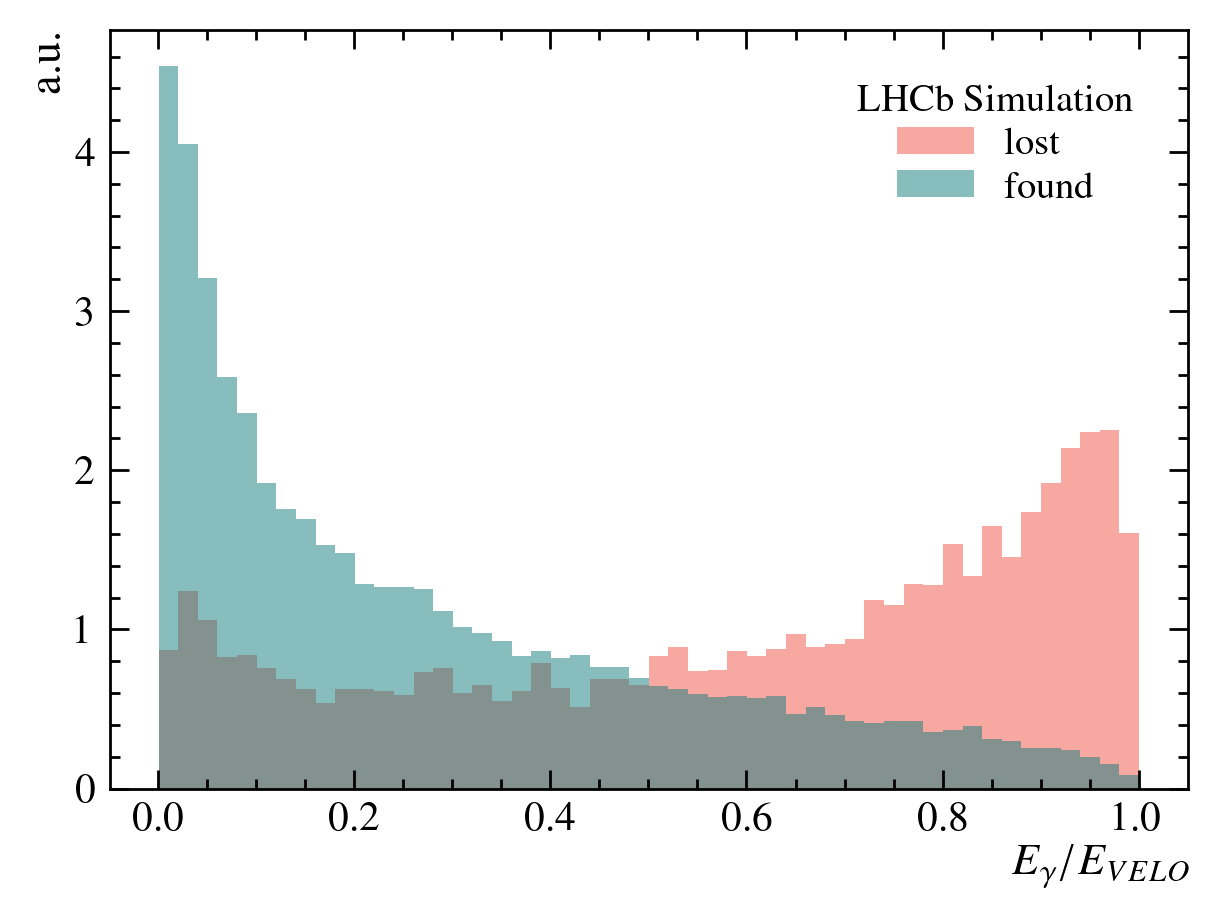

In [18]:
nbins = 50
plt.hist(
    ak.to_numpy(eloss_magnet_lost),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[0.001, 1],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(eloss_magnet_found),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[0.001, 1],
)

plt.xlabel(r"$E_\gamma/E_{VELO}$")
plt.ylabel("a.u.")
# plt.title(r'$B\rightarrow K^\ast ee$, $p>5$GeV, photons w/ brem_vtx_z$<9500$mm')
plt.legend(title="LHCb Simulation")
plt.show()
# plt.savefig(
#     "/work/cetin/Projektpraktikum/thesis/emitted_energy_endVelo2endT.pdf",
#     format="PDF")

In [27]:
# magnet kick position
input_tree = uproot.open(
    {
        "/work/cetin/Projektpraktikum/param_data_B_default.root": "PrParameterisationData_2ece6184.PrDebugTrackingTool/Tuple;1"
    }
)
array = input_tree.arrays()
array = array[array.isElectron & (array.fromB)]
array["dSlope_fringe"] = array["tx_ref"] - array["tx"]
array["z_mag_x_fringe"] = (
    array["x"]
    - array["x_ref"]
    - array["tx"] * array["z"]
    + array["tx_ref"] * array["z_ref"]
) / array["dSlope_fringe"]

(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

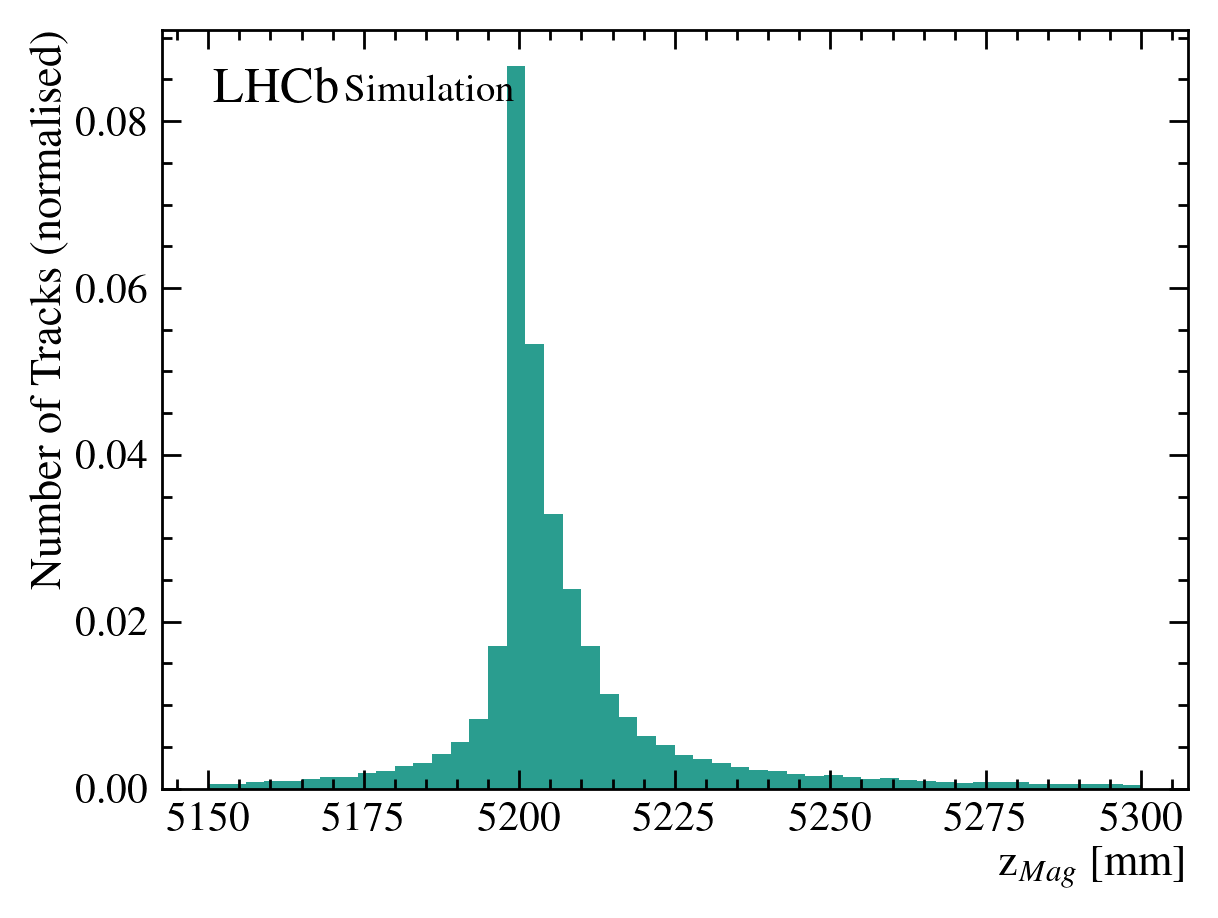

In [28]:
fig = plt.figure()
plt.hist(array["z_mag_x_fringe"],
         bins=50,
         range=[5150, 5300],
         color="#2A9D8F",
         density=True)
plt.xlabel(r"z$_{Mag}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation")
mplhep.

In [29]:
ak.num(array, axis=0)

50501